In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('salaries.csv')

lista_profissoes_ia = [ #Grupo de profissões selecionado
        'AI Developer', 'AI Scientist', 'AI Programmer', 'Machine Learning Engineer',
        'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Research Scientist',
        'NLP Engineer', 'Computer Vision Engineer', 'Deep Learning Engineer'
    ]
lista_outras_profissoes_tech = [ #Grupo de profissões selecionado
    'Data Analyst', 'Business Analyst', 'BI Developer', 'Business Intelligence Engineer',
    'Data Engineer', 'Analytics Engineer', 'Data Strategist', 'Data Manager',
    'Software Engineer', 'Backend Developer', 'Frontend Developer', 'Full Stack Engineer',
    'DevOps Engineer', 'Cloud Engineer', 'Site Reliability Engineer',
    'Infrastructure Engineer', 'Engineering Manager', 'Product Manager', 'Security Engineer',
    'Database Administrator'
]

ia_df = df[df['job_title'].isin(lista_profissoes_ia)].copy() #filtrar apenas os cargos que estão na lista de IA
outras_df = df[df['job_title'].isin(lista_outras_profissoes_tech)].copy() #apenas os cargos que estão na lista outras

df_final = pd.concat([ia_df, outras_df], ignore_index=True) # df concatenado para representar o campo de df que sera trabalhado

Função para criar um espaço entre as barras individuais dos gráficos de barras

In [13]:
def criar_espacamento(ax, espacamento):
    '''
    ax é o gráfico definido
    espacamento é simplesmente o espaço entre as barras
    '''
    #percorremos cada barra (patch) do gráfico
    for patch in ax.patches:
        #pegamos a largura atual da barra
        largura_atual = patch.get_width()
        
        #diminuímos a largura da barra para criar o vão
        patch.set_width(largura_atual - espacamento)
        
        #movemos a barra um pouco para a direita para mantê-la centralizada
        patch.set_x(patch.get_x() + espacamento / 2)

Grupo de dados e campos a serem usados

In [23]:
print(df_final)

       work_year experience_level employment_type                  job_title  \
0           2025               MI              FT             Data Scientist   
1           2025               MI              FT             Data Scientist   
2           2025               SE              FT  Machine Learning Engineer   
3           2025               SE              FT  Machine Learning Engineer   
4           2025               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
84259       2021               MI              FT               Data Analyst   
84260       2021               MI              FT               Data Analyst   
84261       2021               MI              FT              Data Engineer   
84262       2020               MI              FT              Data Engineer   
84263       2021               MI              FT              Data Engineer   

       salary salary_currency  salary_i

**Hipótese de investigação do conjunto de dados escolhido**: (1) O crescimento exponencial da demanda por profissionais de Inteligência Artificial e Ciência de Dados nos últimos anos resultou em um aumento significativamente maior no salário médio de profissionais com maior atuação na área de inteligência artificial (como Data Scientists e Machine Learning Engineers) em comparação com outras profissões de tecnologia mais estabelecidas (como Software Engineers ou Data Analysts) no período de 2020 a 2025. (2) A alta demanda por profissionais ultraespecializados, com o nível de experiência sênior pode ter alavancado o valor da média salarial desses profissionais.

Estatísticas descritivas sobre os bancos de dados:

In [15]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Gráfico que ilustra e evolução da média salarial anual das profissões relacionadas à Inteligência Artificial

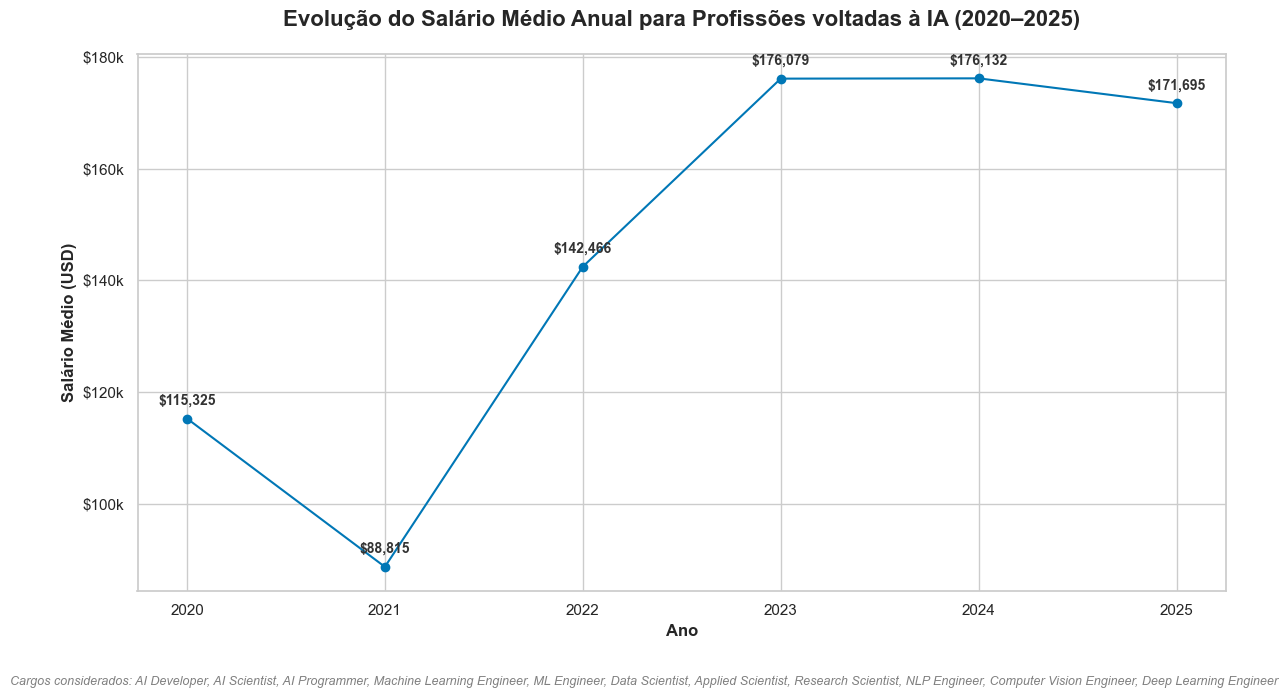

In [16]:
# Agrupar por ano e calcular a média salarial
salario_medio_ano = ia_df.groupby('work_year')['salary_in_usd'].mean().sort_index()

# --- Criação do Gráfico ---
fig, ax = plt.subplots(figsize=(12, 7))

# Linha principal
ax.plot(salario_medio_ano.index, salario_medio_ano.values, marker='o', linestyle='-', color='#0077b6', label='Salário Médio dos profissionais de IA')

# Anotações nos pontos
for ano, salario in salario_medio_ano.items():
    ax.text(ano, salario + 2500, f'${salario:,.0f}', ha='center', size=10, fontweight='bold', color='#333333')

# Títulos e rótulos
ax.set_title('Evolução do Salário Médio Anual para Profissões voltadas à IA (2020–2025)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

# Formatação do eixo Y
formatter = mticker.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k')
ax.yaxis.set_major_formatter(formatter)

# Ticks do eixo X
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(salario_medio_ano.index.astype(int))
plt.yticks(fontsize=11)

# Subtítulo com os cargos considerados
plt.figtext(0.5, 0.01, "Cargos considerados: " + ', '.join(lista_profissoes_ia), 
ha="center", fontsize=9, style='italic', color='gray')

# Layout final
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Gráfico que mostra, entre as profissões que trabalham com IA, a evolução da média salarial anual de algumas

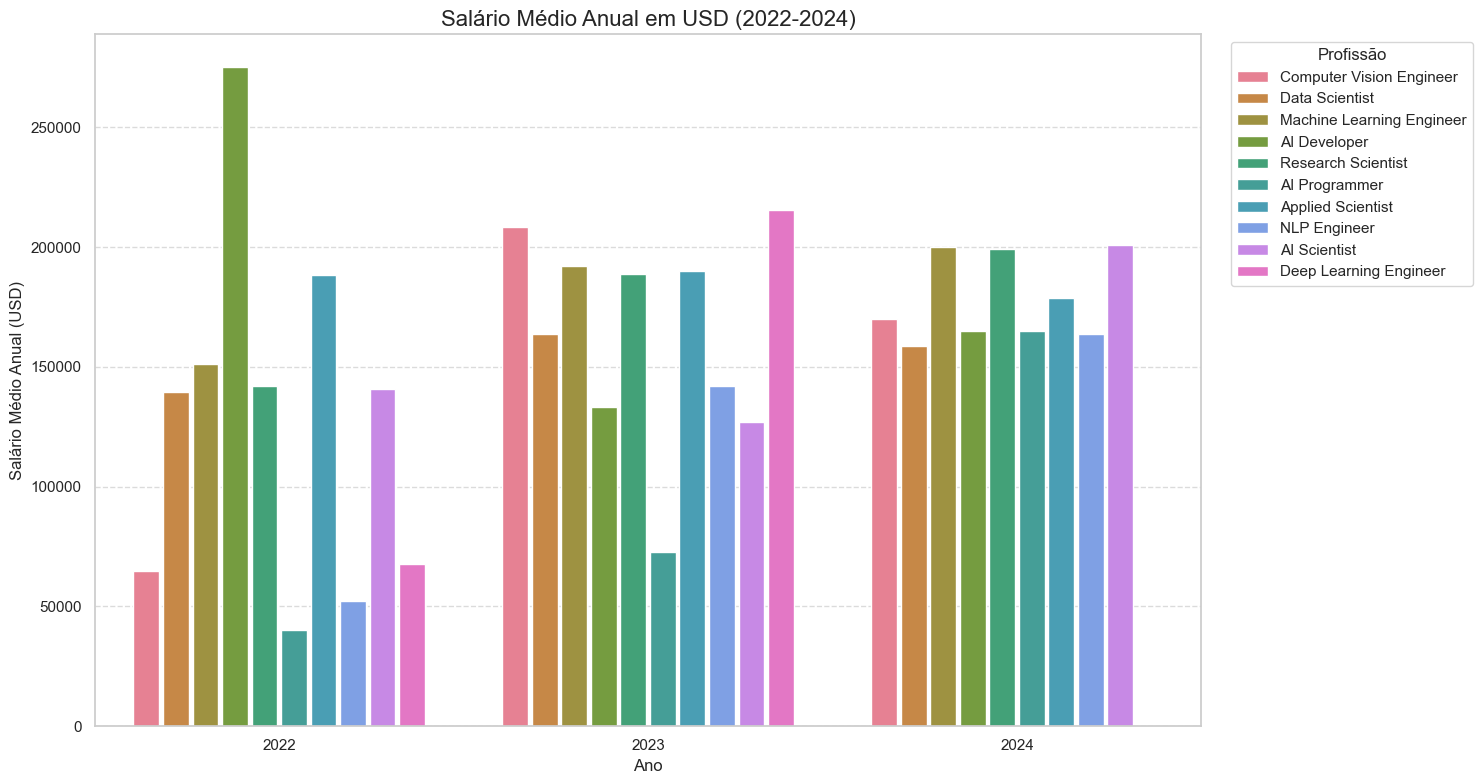

In [ ]:
anos_alvo = [2022, 2023, 2024]
df_filtrado_media_salarial = ia_df[ia_df['work_year'].isin(anos_alvo)]

#criar o gráfico
plt.figure(figsize=(15, 8))

#ax guarda o barplot para usar na função criar_espacamento
ax = sns.barplot(
    data=df_filtrado_media_salarial,
    x="work_year",
    y="salary_in_usd",
    hue="job_title",
    errorbar=None,
    palette=sns.color_palette("husl", n_colors=10)
)
criar_espacamento(ax, 0.01)

plt.title("Salário Médio Anual em USD (2022-2024)", fontsize=16)
plt.ylabel("Salário Médio Anual (USD)", fontsize=12)
plt.xlabel("Ano", fontsize=12)
plt.legend(title="Profissão", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Salvar a imagem final
plt.savefig('salario_medio_espacamento_interno.png')

Gráfico que compara o crescimento da média salarial anual das profissões relacionadas à IA com o das demais profissões

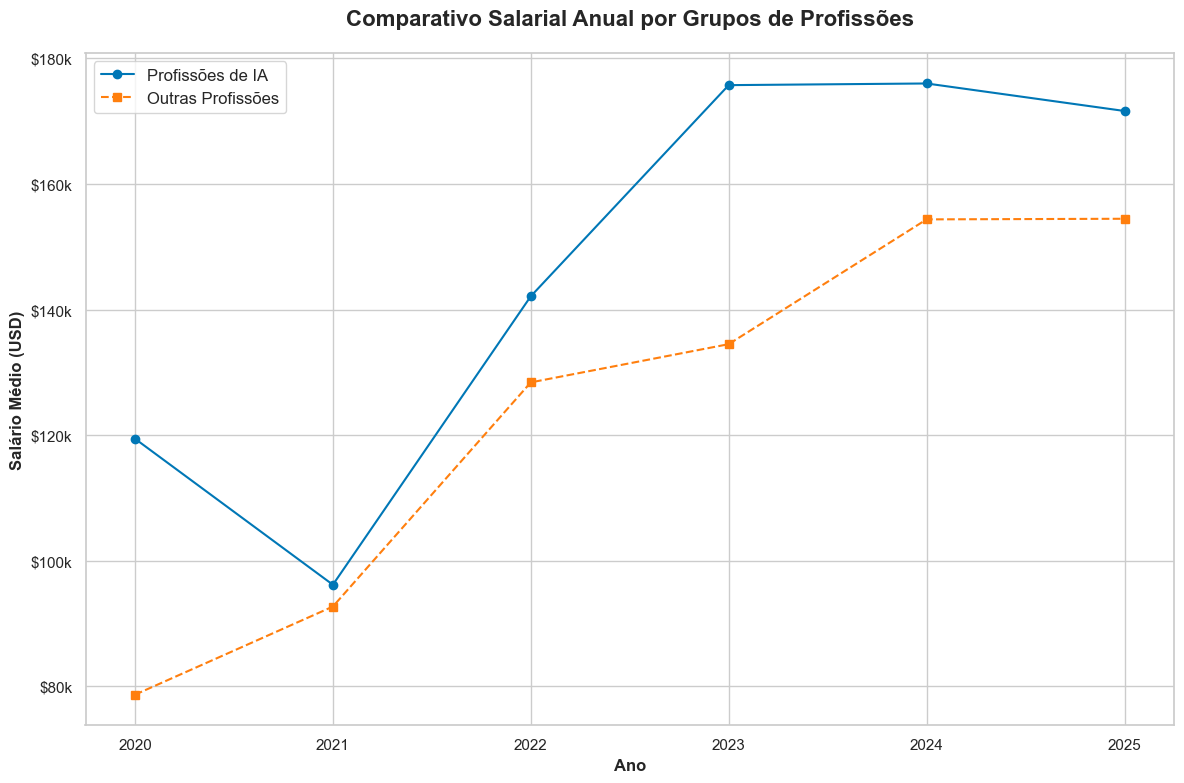

In [18]:
# Criar expressões regulares a partir das suas listas
regex_ia = '|'.join(lista_profissoes_ia)
regex_outras = '|'.join(lista_outras_profissoes_tech)

# Filtrar o DataFrame para cada grupo de profissões
df_ia = df[df['job_title'].str.contains(regex_ia, case=False, na=False)].copy()
df_outras = df[df['job_title'].str.contains(regex_outras, case=False, na=False)].copy()

# Agrupar por ano e calcular a média salarial para cada grupo
avg_ia_salary = df_ia.groupby('work_year')['salary_in_usd'].mean().sort_index()
avg_outras_salary = df_outras.groupby('work_year')['salary_in_usd'].mean().sort_index()

# --- Criação do Gráfico Comparativo ---
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar a linha para profissões de IA
ax.plot(avg_ia_salary.index, avg_ia_salary.values, marker='o', linestyle='-', color='#0077b6', label='Profissões de IA')

# Plotar a linha para as outras profissões
ax.plot(avg_outras_salary.index, avg_outras_salary.values, marker='s', linestyle='--', color='#ff7f0e', label='Outras Profissões')

# Configurar títulos e rótulos
ax.set_title('Comparativo Salarial Anual por Grupos de Profissões', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

# Formatar o eixo Y
formatter = mticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}k')
ax.yaxis.set_major_formatter(formatter)

# Configurar eixo X e legenda
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(avg_ia_salary.index.astype(int))
plt.yticks(fontsize=11)
ax.legend(fontsize=12)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

Gráfico do crescimento percentual a cada ano dos dois segmentos de profissões usados. Percebe-se que as profissões de IA cresceram muito nos anos de 2022 e 2023, ano em que foram lançados muitos serviços de inteligência artifical, como o ChatGPT, MidJourney, Gemini e Copilot.

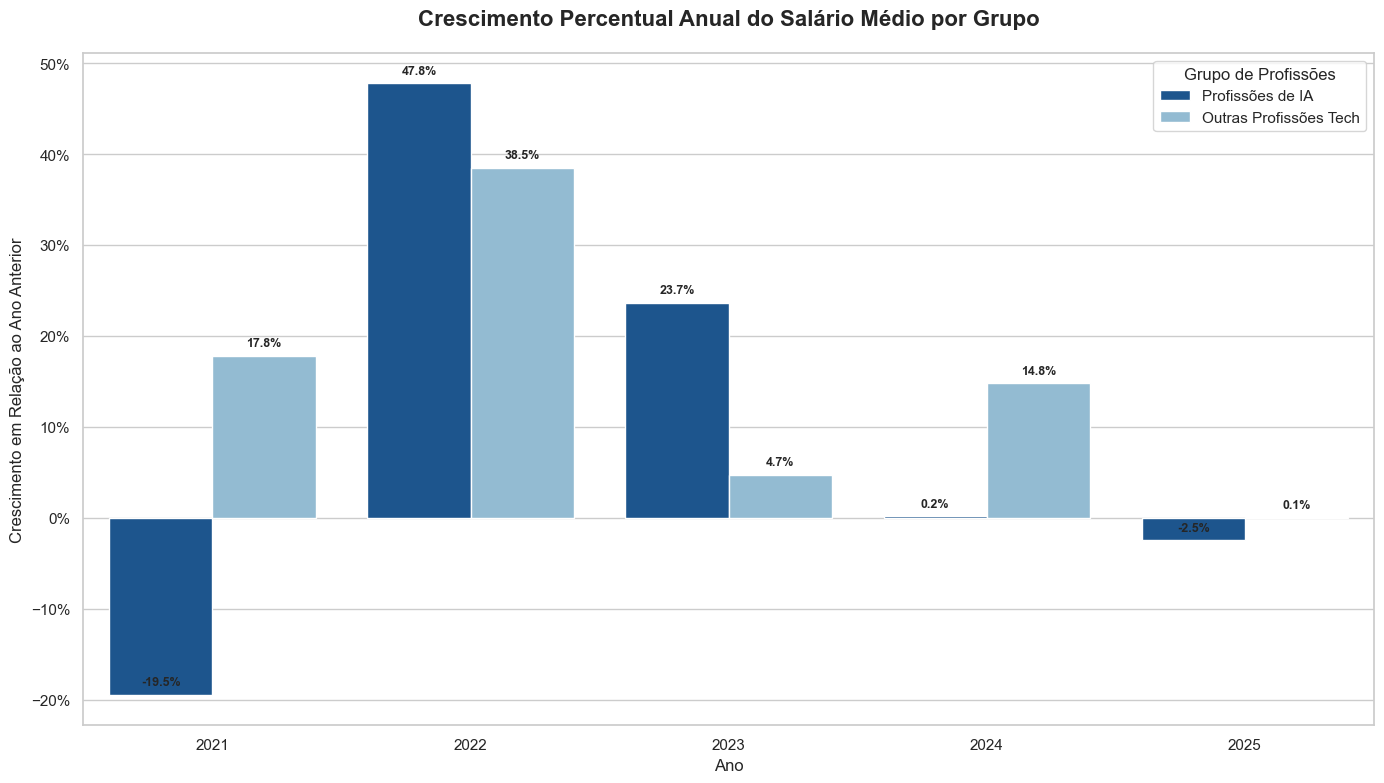

In [19]:
try:
    # Criar expressões regulares a partir das listas
    regex_ia = '|'.join(lista_profissoes_ia)
    regex_outras = '|'.join(lista_outras_profissoes_tech)

    # Filtrar o DataFrame para cada grupo
    df_ia = df[df['job_title'].str.contains(regex_ia, case=False, na=False)]
    df_outras = df[df['job_title'].str.contains(regex_outras, case=False, na=False)]

    # Calcular o salário médio de cada GRUPO por ano
    group_ia_avg_salary = df_ia.groupby('work_year')['salary_in_usd'].mean()
    group_outras_avg_salary = df_outras.groupby('work_year')['salary_in_usd'].mean()

    # Calcular o crescimento percentual para cada GRUPO
    ia_growth = group_ia_avg_salary.pct_change().rename('growth_pct') * 100
    outras_growth = group_outras_avg_salary.pct_change().rename('growth_pct') * 100

    # Adicionar uma coluna para identificar o grupo
    ia_growth = ia_growth.to_frame()
    ia_growth['group'] = 'Profissões de IA'
    outras_growth = outras_growth.to_frame()
    outras_growth['group'] = 'Outras Profissões Tech'

    # Combinar os dados para plotagem
    plot_data = pd.concat([ia_growth, outras_growth]).reset_index().dropna()

    # --- Criação do Gráfico de Barras ---
    fig, ax = plt.subplots(figsize=(14, 8))

    sns.barplot(
        data=plot_data,
        x='work_year',
        y='growth_pct',
        hue='group',
        palette={'Profissões de IA': '#0B559F', 'Outras Profissões Tech': '#89BEDC'},
        ax=ax
    )

    # Formatar o eixo Y como porcentagem
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

    # Adicionar os valores nas barras
    for p in ax.patches:
        if p.get_height() != 0:
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points',
                        fontsize=9,
                        fontweight='bold')

    # Configurar títulos, rótulos e legenda
    ax.set_title('Crescimento Percentual Anual do Salário Médio por Grupo', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Crescimento em Relação ao Ano Anterior', fontsize=12)
    ax.legend(title='Grupo de Profissões', fontsize=11)
    plt.xticks(rotation=0)

    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("O arquivo 'salaries.csv' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Gráfico que mostra a demanda na área de IA por nível de experiência no período de 2022 a 2025

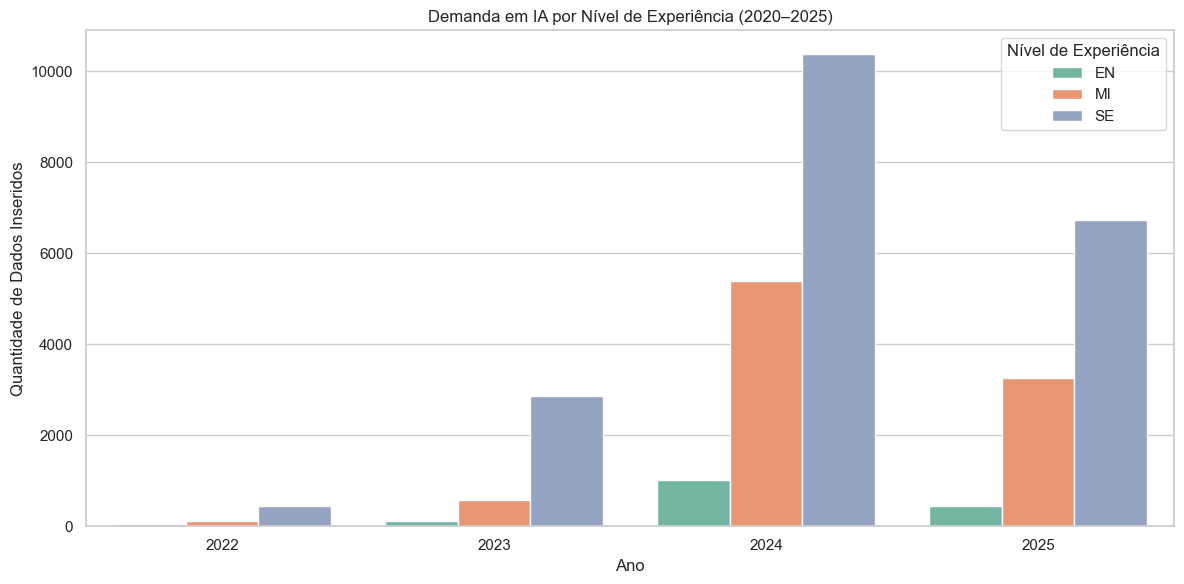

In [37]:
df_filtro = df[df['work_year'].between(2022, 2025)]
niveis_experiencia = ['EN', 'MI', 'SE']

# Filtrar o DataFrame para conter apenas as profissões da lista e anos entre 2020 e 2025
df_ia = df_filtro[df_filtro['job_title'].isin(lista_profissoes_ia)]

# Agrupar e contar por ano e nível de experiência
ia_demand_by_year_experience = df_ia.groupby(['work_year', 'experience_level']).size().reset_index(name='count')

# Garantir a ordem dos níveis de experiência
ia_demand_by_year_experience['experience_level'] = pd.Categorical(
    ia_demand_by_year_experience['experience_level'],
    categories=niveis_experiencia,
    ordered=True
)

# Plotar o gráfico filtrado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ia_demand_by_year_experience,
    x='work_year',
    y='count',
    hue='experience_level',
    palette='Set2'
)
plt.title('Demanda em IA por Nível de Experiência (2020–2025)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Dados Inseridos')
plt.legend(title='Nível de Experiência')
plt.tight_layout()
plt.show()

Gráficos que relacionam a média salarial anual com o nível de experiência durante o período de 2020 a 2025

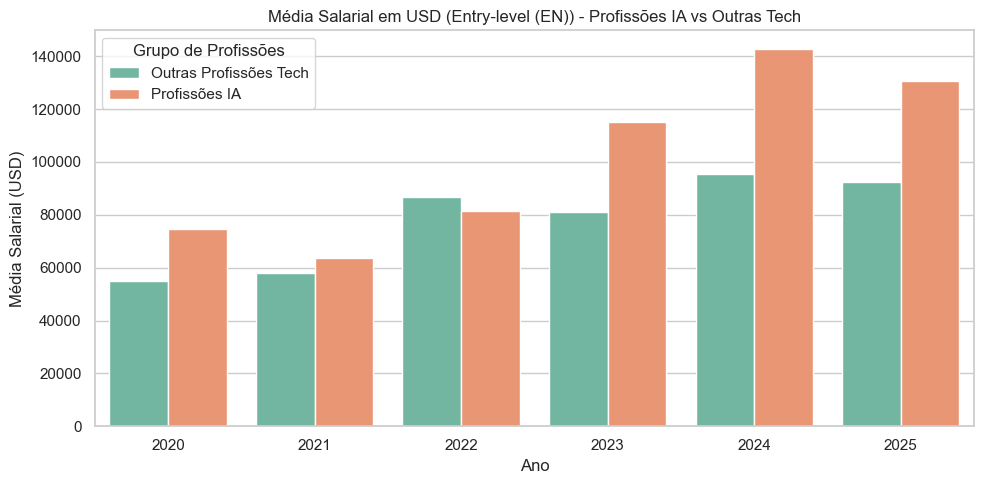

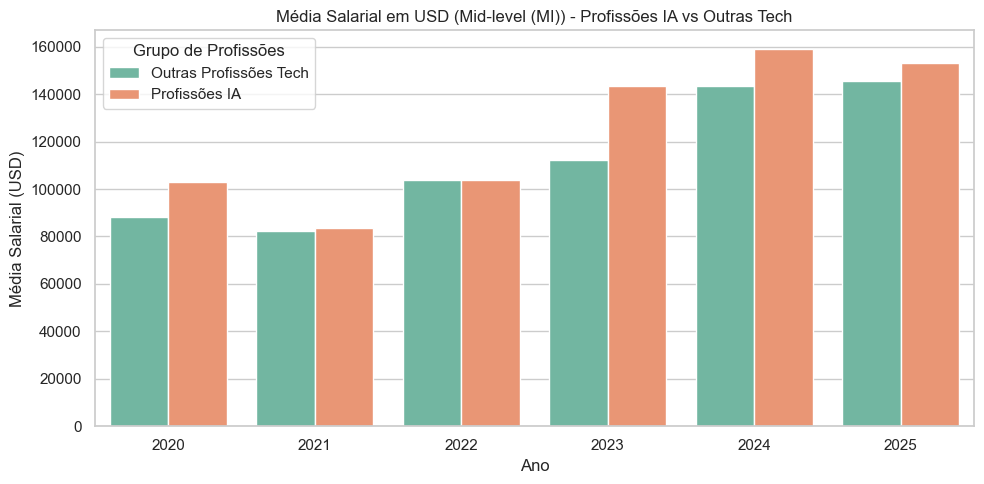

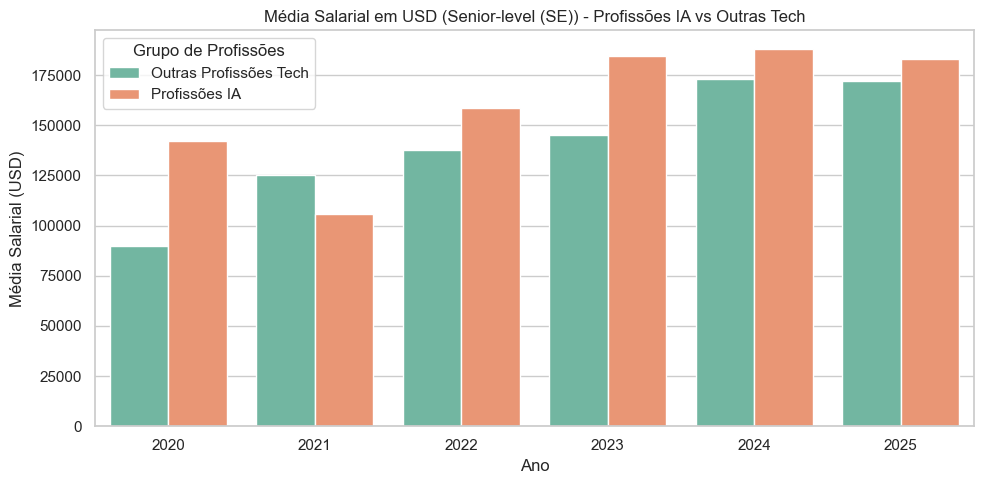

In [21]:
# Adicionar rótulo de grupo
df_filtro['grupo'] = df_filtro['job_title'].apply(
    lambda title: 'Profissões IA' if title in lista_profissoes_ia 
    else 'Outras Profissões Tech' if title in lista_outras_profissoes_tech 
    else None
)

# Filtrar apenas os dois grupos
df_comparativo = df_filtro[df_filtro['grupo'].notnull()]

# Níveis de experiência
titulos = {
    'EN': 'Entry-level (EN)',
    'MI': 'Mid-level (MI)',
    'SE': 'Senior-level (SE)',
}

# Criar gráficos separados
for nivel in niveis_experiencia:
    df_nivel = df_comparativo[df_comparativo['experience_level'] == nivel]
    media_salarial = df_nivel.groupby(['work_year', 'grupo'])['salary_in_usd'].mean().reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=media_salarial,
        x='work_year',
        y='salary_in_usd',
        hue='grupo',
        palette='Set2'
    )
    plt.title(f'Média Salarial em USD ({titulos[nivel]}) - Profissões IA vs Outras Tech')
    plt.xlabel('Ano')
    plt.ylabel('Média Salarial (USD)')
    plt.legend(title='Grupo de Profissões')
    plt.tight_layout()
    plt.show()

SKEWNESS e KURTOSIS que mostra a distribuição de salários para as profissões mais relacionadas com inteligência artificial

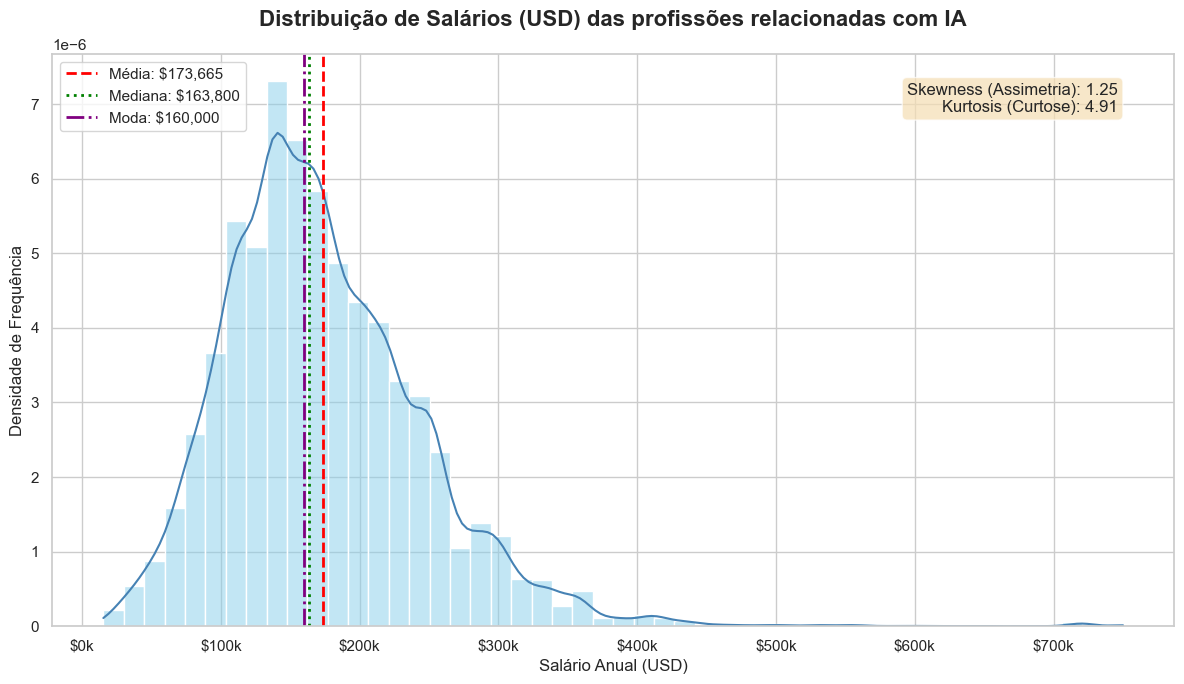

In [22]:
salary_data = ia_df['salary_in_usd']

# --- MÉTRICAS ---
skewness = salary_data.skew()
kurtosis = salary_data.kurt()
mean_salary = salary_data.mean()
median_salary = salary_data.median()
mode_salary = salary_data.mode()[0]

# --- CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(12, 7))

# Plotar o histograma e a curva de densidade (KDE)
ax = sns.histplot(salary_data, kde=True, bins=50, color='skyblue', stat='density')
ax.lines[0].set_color('steelblue') 

# --- LINHAS VERTICAIS ---
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Média: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle=':', linewidth=2, label=f'Mediana: ${median_salary:,.0f}')
# >>> LINHA DA MODA ADICIONADA AQUI <<<
plt.axvline(mode_salary, color='purple', linestyle='-.', linewidth=2, label=f'Moda: ${mode_salary:,.0f}')

# Caixa de texto com Skewness e Kurtosis
text_str = (f"Skewness (Assimetria): {skewness:.2f}\n"
f"Kurtosis (Curtose): {kurtosis:.2f}")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.95, 0.95, text_str, transform=ax.transAxes, fontsize=12,
verticalalignment='top', horizontalalignment='right', bbox=props)

# Títulos e rótulos
plt.title('Distribuição de Salários (USD) das profissões relacionadas com IA', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

# Formatar o eixo X para melhor leitura
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}k'))

plt.legend()
plt.tight_layout()
plt.savefig('distribuicao_salarios_completa.png')

Com os dados apresentados, a hipótese pode ser sustentada. O gráfico de Crescimento Percentual Anual (gráfico 4) demonstra que o aumento salarial para profissões de IA foi drasticamente superior ao de outras áreas de tecnologia, especialmente com um pico em 2022 e 2023, mesmo com baixa em 2024 e leve queda em 2025. A segunda parte da hipótese também é validada, pois o gráfico de Demanda por Nível de Experiência (gráfico 5) mostra uma demanda crescente por profissionais de nível Sênior (SE). Além disso, a análise da distribuição salarial (gráfico 7) revela uma assimetria positiva (skewness), indicando que um número menor de salários muito altos está elevando a média salarial geral do grupo de IA, o que reforça a ideia de que a valorização desses profissionais impulsionou o crescimento médio de toda a área.